<a href="https://colab.research.google.com/github/MohitGupta2021/ml/blob/main/_random_forests_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
machine_cpu=fetch_openml(name='machine_cpu',version=1)

In [5]:
type(machine_cpu)

sklearn.utils.Bunch

In [6]:
machine_cpu.details

{'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'contributor': 'L. Torgo',
 'default_target_attribute': 'class',
 'description_version': '1',
 'file_id': '3667',
 'format': 'ARFF',
 'id': '230',
 'language': 'English',
 'licence': 'Public',
 'md5_checksum': 'e26d62e83069b74dff6cf492e06868a0',
 'name': 'machine_cpu',
 'original_data_url': 'http://www.ics.uci.edu/~mlearn/MLSummary.html',
 'processing_date': '2020-11-20 19:15:43',
 'status': 'active',
 'tag': 'OpenML-Reg19',
 'upload_date': '2014-04-23T13:20:36',
 'url': 'https://www.openml.org/data/v1/download/3667/machine_cpu.arff',
 'version': '1',
 'version_label': '1',
 'visibility': 'public'}

In [7]:
machine_cpu.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MYCT    209 non-null    float64
 1   MMIN    209 non-null    float64
 2   MMAX    209 non-null    float64
 3   CACH    209 non-null    float64
 4   CHMIN   209 non-null    float64
 5   CHMAX   209 non-null    float64
dtypes: float64(6)
memory usage: 9.9 KB


In [8]:
machine_cpu.DESCR

'**Author**:   \n**Source**: Unknown -   \n**Please cite**:   \n\nThe problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine\n Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).\n The used attributes are :\n MYCT: machine cycle time in nanoseconds (integer)\n MMIN: minimum main memory in kilobytes (integer)\n MMAX: maximum main memory in kilobytes (integer)\n CACH: cache memory in kilobytes (integer)\n CHMIN: minimum channels in units (integer)\n CHMAX: maximum channels in units (integer)\n PRP: published relative performance (integer) (target variable)\n \n Original source: UCI machine learning repository. \n Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at\n http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html\n Characteristics: 209 cases; 6 continuous variables\n\nDownloaded from openml.org.'

In [9]:
machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [10]:
machine_cpu.target_names

['class']

In [11]:
d=pd.DataFrame(machine_cpu.data,columns=machine_cpu.feature_names)

In [12]:
d.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125.0,256.0,6000.0,256.0,16.0,128.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0


In [13]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0


In [14]:
machine_data=machine_cpu.frame

In [15]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(machine_data,test_size=0.2,random_state=20)


In [16]:
len(train_data)

167

In [17]:
len(test_data)

42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4828f22750>,
      dtype=object)

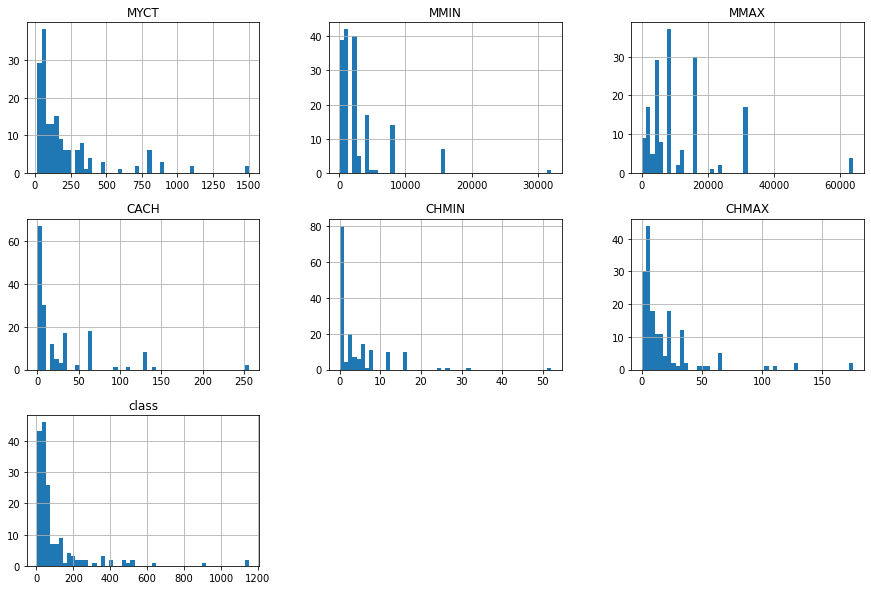

In [18]:
train_data.hist(bins=50,figsize=(15,10))

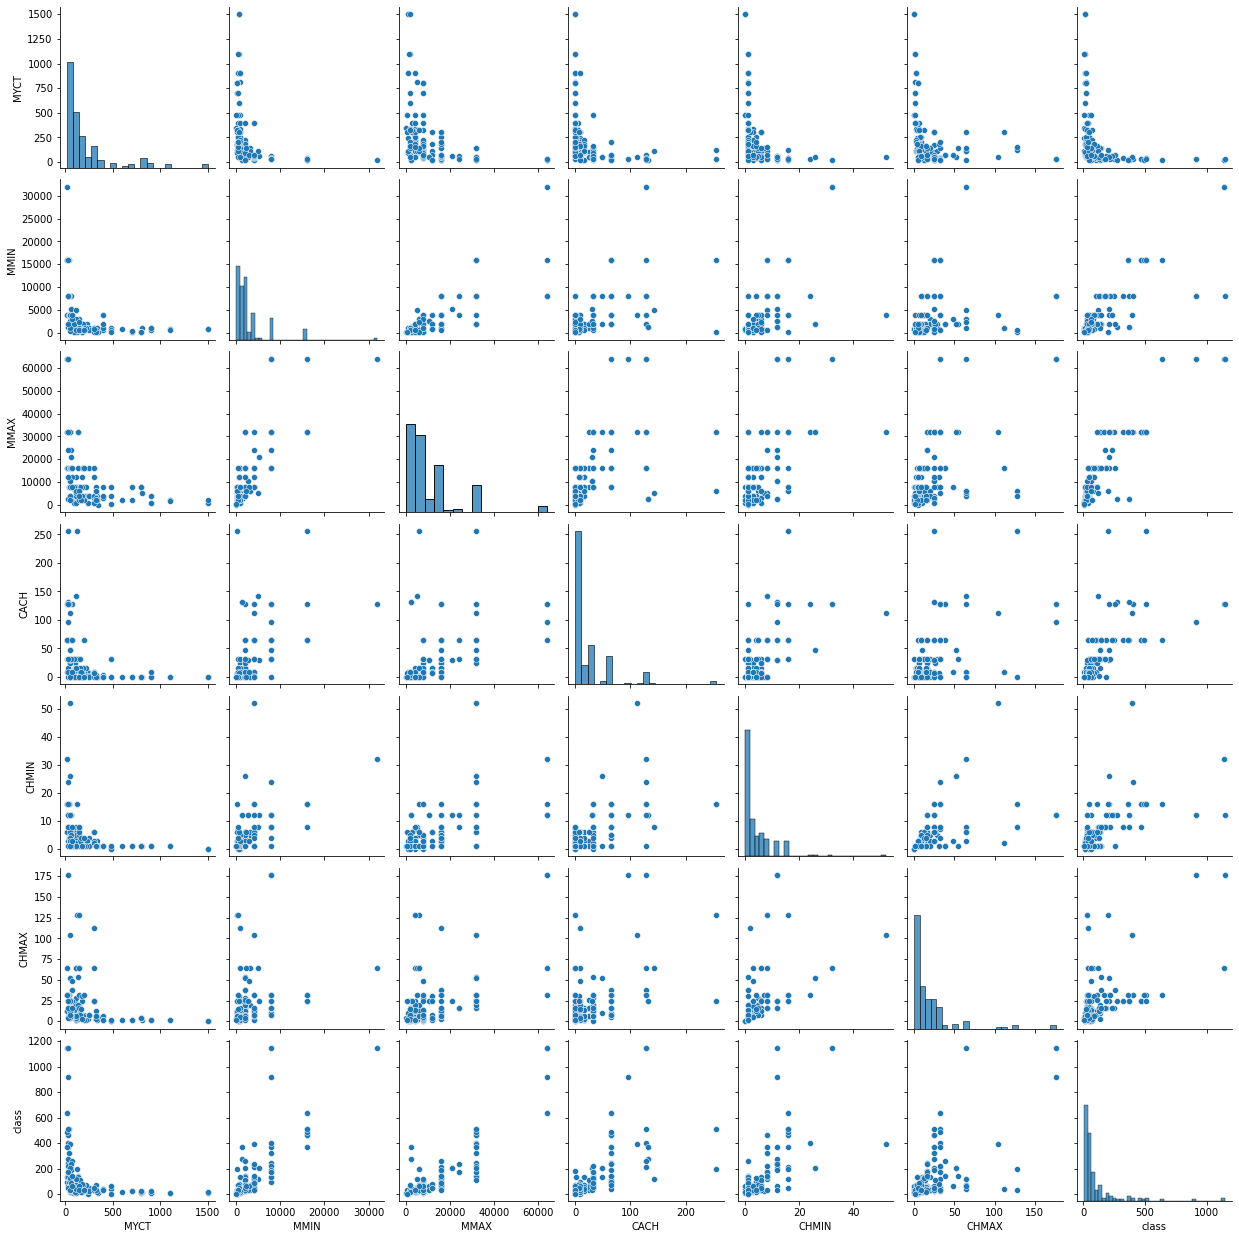

In [19]:
sns.pairplot(train_data)

In [20]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,167.0,207.958084,266.772823,17.0,50.0,110.0,232.5,1500.0
MMIN,167.0,2900.826347,4165.950964,64.0,768.0,2000.0,3100.0,32000.0
MMAX,167.0,11761.161677,12108.332354,64.0,4000.0,8000.0,16000.0,64000.0
CACH,167.0,26.071856,42.410014,0.0,0.0,8.0,32.0,256.0
CHMIN,167.0,4.760479,6.487439,0.0,1.0,2.0,6.0,52.0
CHMAX,167.0,18.616766,27.489919,0.0,5.0,8.0,24.0,176.0
class,167.0,109.185629,174.061117,6.0,27.5,50.0,110.0,1150.0


In [21]:
train_data.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
class    0
dtype: int64

In [22]:
corr=train_data.corr()
corr['class']

MYCT    -0.301805
MMIN     0.797751
MMAX     0.869077
CACH     0.671581
CHMIN    0.648653
CHMAX    0.606557
class    1.000000
Name: class, dtype: float64

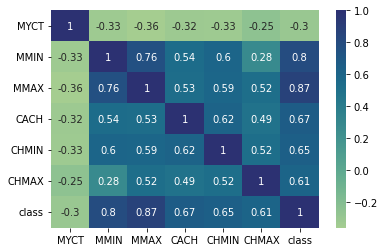

In [23]:
sns.heatmap(corr,annot=True,cmap='crest')

In [24]:
X_train=train_data.drop('class',axis=1)
y_train=train_data['class']

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)

In [26]:
X_train_scaled

array([[-0.63900526,  0.26464052,  0.35112901,  2.41062632,  1.73771567,
         0.4883057 ],
       [-0.25550755, -0.2168858 ,  1.67650726,  0.14020209, -0.58139874,
         1.29100599],
       [-0.68412264,  1.22769317,  1.67650726,  0.89701017,  1.11928516,
        -0.09547633],
       ...,
       [-0.66908351,  3.15379846,  1.67650726,  5.43785862,  1.73771567,
         0.19641469],
       [-0.02992066, -0.57514138,  0.35112901, -0.61660598, -0.11757586,
         0.4883057 ],
       [ 1.02281816, -0.67529886, -0.93183714, -0.61660598, -0.58139874,
        -0.64277198]])

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1)

forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error
def predict(input_data,model,labels):
  pred=model.predict(input_data)
  mse=mean_squared_error(labels,pred)
  rmse=np.sqrt(mse)
  rmse
  return rmse



In [29]:
predict(X_train_scaled,forest_reg,y_train)

9.724590719956222

In [30]:
forest_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [31]:
from sklearn.model_selection import GridSearchCV
params_grid={
    'n_estimators':[100,200,300,400,500],'max_leaf_nodes':list(range(0,50))}

grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=5)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                            11, 12, 13, 14, 15, 16, 17, 18, 19,
                                            20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, ...],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [32]:
forest_best=grid_search.best_estimator_

In [33]:
grid_search.best_index_

211

In [34]:
grid_search.best_params_

{'max_leaf_nodes': 42, 'n_estimators': 200}

In [35]:
predict(X_train_scaled,forest_best,y_train)

12.709506767466658

In [36]:
y_train

169    212.0
90     141.0
191    248.0
96     465.0
206     52.0
       ...  
148    143.0
137     30.0
156    510.0
15      35.0
99       6.0
Name: class, Length: 167, dtype: float64